In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\TEMP\Desktop\Portfolio\Marketing Campaign Performance\marketing_campaign_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [4]:
#Format the date column as datetime 
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
#Format columns as categorical
df['Company'] = df['Company'].astype('category')
df['Campaign_Type'] = df['Campaign_Type'].astype('category')
df['Target_Audience'] = df['Target_Audience'].astype('category')
df['Channel_Used'] = df['Channel_Used'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Language'] = df['Language'].astype('category')
df['Customer_Segment'] = df['Customer_Segment'].astype('category')

In [8]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [13]:
#Remove the '$' and ',' from the Acquisition Cost column
df['Acquisition_Cost'] = df['Acquisition_Cost'].str.replace('$', '').str.replace(',', '').astype(float)

In [14]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [15]:
# Convert 'Duration' column to numeric by extracting the number of days
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       200000 non-null  int64         
 1   Company           200000 non-null  category      
 2   Campaign_Type     200000 non-null  category      
 3   Target_Audience   200000 non-null  category      
 4   Duration          200000 non-null  int32         
 5   Channel_Used      200000 non-null  category      
 6   Conversion_Rate   200000 non-null  float64       
 7   Acquisition_Cost  200000 non-null  float64       
 8   ROI               200000 non-null  float64       
 9   Location          200000 non-null  category      
 10  Language          200000 non-null  category      
 11  Clicks            200000 non-null  int64         
 12  Impressions       200000 non-null  int64         
 13  Engagement_Score  200000 non-null  int64         
 14  Cust

In [17]:
df.describe()

,Campaign_ID,Duration,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,Date
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000
mean,100000.500000,37.503975,0.080070,12504.393040,5.002438,549.772030,5507.301520,5.494710,2021-07-01 23:35:09.600000
min,1.000000,15.000000,0.010000,5000.000000,2.000000,100.000000,1000.000000,1.000000,2021-01-01 00:00:00
25%,50000.750000,30.000000,0.050000,8739.750000,3.500000,325.000000,3266.000000,3.000000,2021-04-02 00:00:00
50%,100000.500000,30.000000,0.080000,12496.500000,5.010000,550.000000,5517.500000,5.000000,2021-07-02 00:00:00
75%,150000.250000,45.000000,0.120000,16264.000000,6.510000,775.000000,7753.000000,8.000000,2021-10-01 00:00:00
max,200000.000000,60.000000,0.150000,20000.000000,8.000000,1000.000000,10000.000000,10.000000,2021-12-31 00:00:00
std,57735.171256,16.746720,0.040602,4337.664545,1.734488,260.019056,2596.864286,2.872581,NaN


Data Exploration

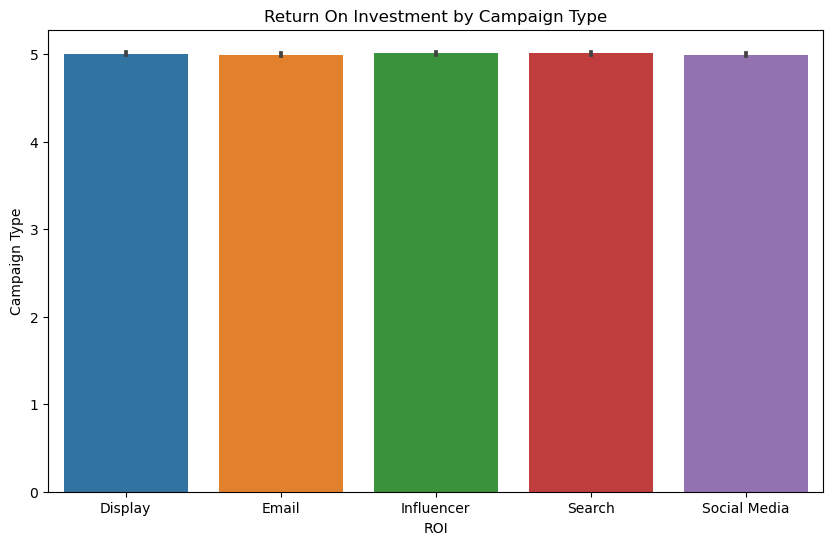

In [20]:
#Relationship between the campaign type and the ROI

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Campaign_Type', y= 'ROI')
plt.title('Return On Investment by Campaign Type')
plt.xlabel('ROI')
plt.ylabel('Campaign Type')
plt.show()

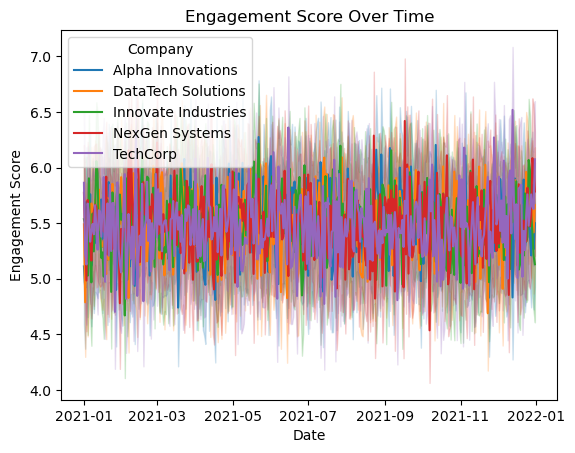

In [23]:
#Does the engagemnt score improve/ increase overtime

date_order= df.sort_values('Date')
sns.lineplot(data=date_order, x='Date', y='Engagement_Score', hue='Company')
plt.title('Engagement Score Over Time')
plt.ylabel('Engagement Score')
plt.xlabel('Date')
plt.show()

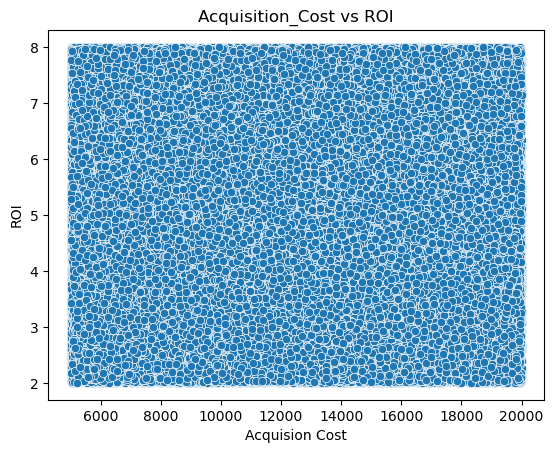

In [29]:
#Relationship between the acquisition cost and the return on investment

sns.scatterplot(data= df, x='Acquisition_Cost', y='ROI')
plt.title('Acquisition_Cost vs ROI')
plt.ylabel('ROI')
plt.xlabel('Acquision Cost')
plt.show()

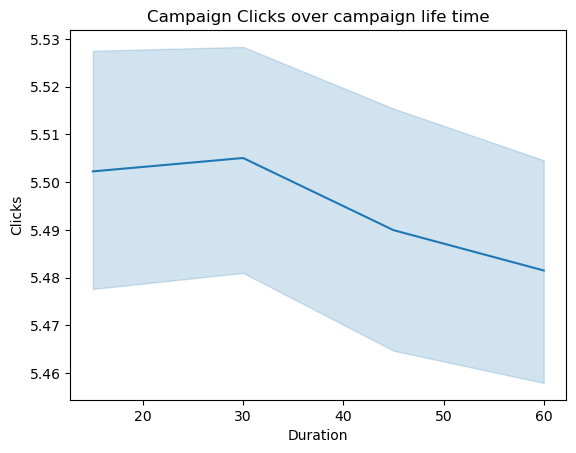

In [30]:
#Relationship between the campaign lifetime and the number of campaign clicks

duration_order = df.sort_values('Duration')
sns.lineplot(data= duration_order, x='Duration', y='Engagement_Score')
plt.title('Campaign Clicks over campaign life time')
plt.xlabel('Duration')
plt.ylabel('Clicks')
plt.show()

In [ ]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df['Impressions'], labels = df['Customer_Segment'], colors = colors, autopct='%.0f%%')
plt.show()